![logo_ironhack_blue 7](https://user-images.githubusercontent.com/23629340/40541063-a07a0a8a-601a-11e8-91b5-2f13e4e6b441.png)

# Lab | Random Forests

For this lab, you will be using the .CSV files provided in the `files_for_lab` folder.  These are cleaned versions of the learningSet data from the Case Study 'Healthcare for All'.   
Begin a new Jupyter Notebook after Forking and Cloning this Repo.

### Instructions

- Apply the Random Forests algorithm but this time only by upscaling the data to deal with the imbalance.
- Use Feature Selections that you have learned in class to decide if you want to use all of the features (Variance Threshold, RFE, PCA, etc.)
- Re-run the Random Forest algorithm to determine if the Feature Selection has improved the results.
- Discuss the output and its impact in the business scenario. Is the cost of a false positive equals to the cost of the false negative? How would you change your algorithm or data in order to maximize the return of the business?

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [2]:
categorical = pd.read_csv('files_for_lab/categorical.csv')
numerical = pd.read_csv('files_for_lab/numerical.csv')
target = pd.read_csv('files_for_lab/target.csv')

In [3]:
numerical

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,...,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
0,0,60.000000,5,9,0,0,39,34,18,10,...,14,5.0,12.0,10.0,4,7.741935,95515,0,4,39
1,1,46.000000,6,9,16,0,15,55,11,6,...,1,10.0,25.0,25.0,18,15.666667,148535,0,2,1
2,1,61.611649,3,1,2,0,20,29,33,6,...,14,2.0,16.0,5.0,12,7.481481,15078,1,4,60
3,0,70.000000,1,4,2,0,23,14,31,3,...,7,2.0,11.0,10.0,9,6.812500,172556,1,4,41
4,0,78.000000,3,2,60,1,28,9,53,26,...,8,3.0,15.0,15.0,14,6.864865,7112,1,2,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,1,61.611649,5,9,0,14,36,47,11,7,...,0,25.0,25.0,25.0,9,25.000000,184568,0,1,12
95408,1,48.000000,7,9,1,0,31,43,19,4,...,0,20.0,20.0,20.0,9,20.000000,122706,1,1,2
95409,1,60.000000,5,9,0,0,18,46,20,7,...,4,3.0,10.0,10.0,3,8.285714,189641,1,3,34
95410,0,58.000000,7,9,0,0,28,35,20,9,...,18,5.0,21.0,18.0,4,12.146341,4693,1,4,11


In [4]:
categorical

,STATE,CLUSTER,HOMEOWNR,GENDER,DATASRCE,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B,...,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM
0,IL,36,H,F,3,L,E,C,T,2,...,37,12,92,8,94,2,95,12,89,11
1,CA,14,H,M,3,L,G,A,S,1,...,52,2,93,10,95,12,95,12,93,10
2,NC,43,U,M,3,L,E,C,R,2,...,0,2,91,11,92,7,95,12,90,1
3,CA,44,U,F,3,L,E,C,R,2,...,28,1,87,11,94,11,95,12,87,2
4,FL,16,H,F,3,L,F,A,S,2,...,20,1,93,10,96,1,96,1,79,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,other,27,H,M,3,L,G,C,C,2,...,0,2,96,2,96,2,96,2,96,2
95408,TX,24,H,M,3,L,F,A,C,1,...,50,1,96,3,96,3,96,3,96,3
95409,MI,30,H,M,3,L,E,B,C,3,...,38,1,96,3,95,1,96,10,94,10
95410,CA,24,H,F,2,L,F,A,C,1,...,40,5,90,11,96,8,97,1,86,12


In [5]:
data = pd.concat([numerical, categorical, target], axis = 1)
data['TARGET_B'].value_counts()

0    90569
1     4843
Name: TARGET_B, dtype: int64

In [6]:
y = data['TARGET_B']
X = data.drop(['TARGET_B'], axis = 1) # TARGET_D???

numericalX = X.select_dtypes(np.number)
categoricalX = X.select_dtypes(object)

In [7]:
# we OneHotEncode the categoricals so we can use the same dataset to perform a regression later.
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first').fit(categoricalX)
encoded_categorical = encoder.transform(categoricalX).toarray()
encoded_categorical = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out()) # needed to avoid error
X = pd.concat([numericalX, encoded_categorical], axis = 1)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# for downsampling we need to temporarily concat X_train and y_train
trainset = pd.concat([X_train, y_train], axis=1)

category_0 = trainset[trainset['TARGET_B'] == 0]
category_1 = trainset[trainset['TARGET_B'] == 1]

In [9]:
from sklearn.utils import resample

category_1_oversampled = resample(category_1,
                                  replace=True,
                                  n_samples = len(category_0))

In [10]:
print(category_0.shape)
print(category_1_oversampled.shape)

(72486, 356)
(72486, 356)


In [11]:
train_data_upsampled = pd.concat([category_0, category_1_oversampled], axis=0)

In [12]:
train_data_upsampled['TARGET_B'].value_counts()

0    72486
1    72486
Name: TARGET_B, dtype: int64

In [13]:
train_data_upsampled = train_data_upsampled.sample(frac =1) #randomize the rows

In [14]:
X_train_up = train_data_upsampled.drop(['TARGET_B'],axis=1)
y_train_up = train_data_upsampled['TARGET_B']

In [15]:
X_train_up = pd.DataFrame(X_train_up)
X_test = pd.DataFrame(X_test)

y_train_regression = X_train_up['TARGET_D']
y_test_regression = X_test['TARGET_D']

# Now we can remove the column target d from the set of features
X_train_up = X_train_up.drop(['TARGET_D'], axis = 1)
X_test = X_test.drop(['TARGET_D'], axis = 1)

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

clf = RandomForestClassifier(max_depth=5, # max number of questions to ask
                             min_samples_split=20, # amount of rows still considered at every question
                             min_samples_leaf =20, # ultimate answer based on at least this many rows
                             max_samples=0.8, # fraction of X-train to use in each tree
                             random_state=42)
clf.fit(X_train_up, y_train_up)
print(clf.score(X_train_up, y_train_up))
print(clf.score(X_test, y_test))

y_pred = clf.predict(X_test)
display(y_test.value_counts())
display(confusion_matrix(y_test, y_pred))

0.6224788234969512
0.6001676885185767


0    18083
1     1000
Name: TARGET_B, dtype: int64

array([[10898,  7185],
       [  445,   555]], dtype=int64)

In [17]:
# extra: how to select which metric to use in CV
# For cross validation
from sklearn.model_selection import cross_val_score
clf = RandomForestClassifier(max_depth=5,
                             min_samples_split=20,
                             min_samples_leaf =20,
                            # max_samples=0.8
                            )
cross_val_scores = cross_val_score(clf, X_train_up, y_train_up, cv=10)
print(np.mean(cross_val_scores))

0.6185469999820057


In [18]:
cross_val_score(clf, X_train_up, y_train_up, cv=5, scoring='recall_macro')

array([0.62155481, 0.6200042 , 0.61988687, 0.61947299, 0.61540319])

## Using Feature Selection

Decision Tree

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
X_train = X_train.drop(['TARGET_D'],axis=1)

In [23]:
model = DecisionTreeClassifier(max_depth=4)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [24]:
X_train

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,...,RFA_2A_E,RFA_2A_F,RFA_2A_G,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U
79401,1,75.000000,4,6,2,0,31,10,68,6,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
86429,0,53.000000,5,9,0,0,29,24,38,7,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
76729,1,60.000000,5,1,5,0,42,16,62,10,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38838,1,77.000000,6,6,9,1,40,23,41,8,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
83012,3,55.000000,5,2,21,33,27,29,18,12,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21243,0,70.000000,3,9,5,2,37,10,32,26,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
45891,2,66.000000,3,6,0,0,36,11,62,4,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
42613,1,61.611649,5,9,0,0,35,29,42,17,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
43567,1,76.000000,5,3,1,0,59,22,31,3,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
print("test data accuracy was ",model.score(X_test,y_test))
# 100% on training data
print("train data accuracy was ",model.score(X_train,y_train))

test data accuracy was  0.9473353246344914
train data accuracy was  0.9498748837270238


In [ ]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
# to find the optimum dept, I repeat the process but choose the max_depth of the tree
max_depth = range(1,30)
test = []
train = []

for depth in max_depth:
    model = DecisionTreeClassifier(max_depth=depth, random_state=0)
    model.fit(X_train, y_train)
    test.append(model.score(X_test,y_test))
    train.append(model.score(X_train,y_train))

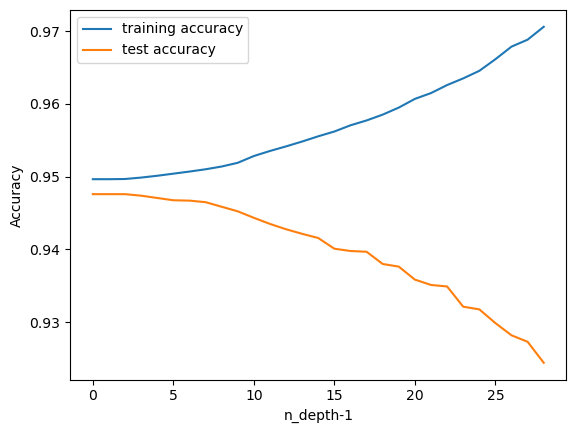

In [ ]:
# we quickly see overfitting properties
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot( train, label="training accuracy")
plt.plot( test, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_depth-1")
plt.legend()

In [25]:
# we choose 2 as our optimum tree depth
model = DecisionTreeClassifier(max_depth = 2)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [26]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
y_test

58053    0
9484     0
13395    0
1466     0
2076     0
        ..
94255    0
26449    0
1969     0
48574    0
73270    0
Name: TARGET_B, Length: 19083, dtype: int64

In [ ]:
model.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
feature_names = data.columns